# 2) Salary_hike -> Build a prediction model for Salary_hike

In [1]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
# load the Salary_Data.csv
df = pd.read_csv('Salary_Data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
# Rename the column name as Experience_in_years
df = df.rename({'YearsExperience':'Experience_in_years'},axis = 1)

In [4]:
df.head()

,Experience_in_years,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [5]:
# basic info about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Experience_in_years  30 non-null     float64
 1   Salary               30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [7]:
df.shape

(30, 2)

In [8]:
df.describe()

,Experience_in_years,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [11]:
# check the correlation between the data
corel = df.corr()

In [12]:
corel

,Experience_in_years,Salary
Experience_in_years,1.000000,0.978242
Salary,0.978242,1.000000


# there is a positive correlation between the experience and salary

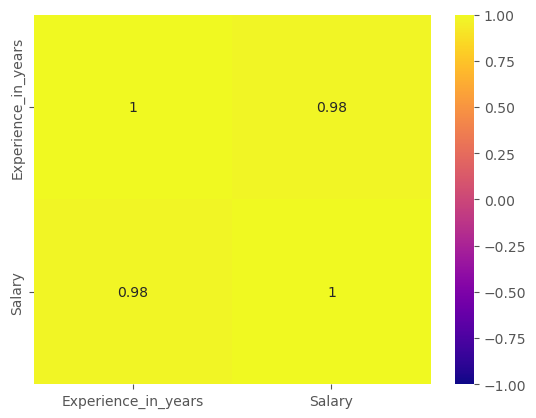

In [14]:
# heat map visualisation
sns.heatmap(data = corel , vmin = -1 , vmax = 1 , annot = True , cmap = 'plasma');

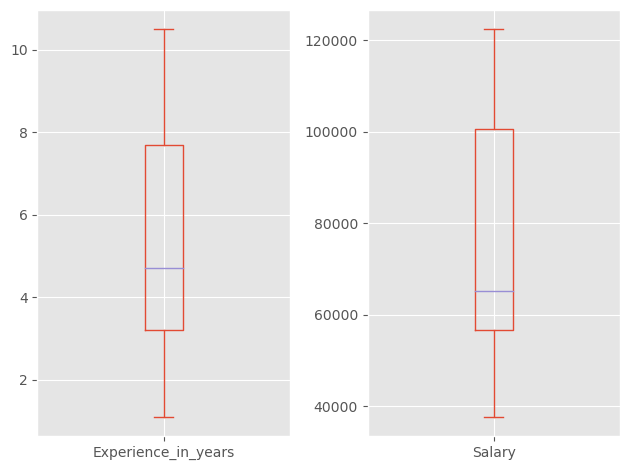

In [15]:
# outliers detection
df.plot(kind = 'box' , subplots = True)
plt.tight_layout();

# No outliers were detected , we can proceed further

In [16]:
# We are going to build a simple linear regression model by sklearn library
# import required libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [25]:
# differentiate the target variable and independent variable
x = df.drop('Salary', axis = 1)
y = df['Salary']

In [26]:
# Split the data into rain and test data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [27]:
# create a linear regression model using sklearn & fit it on the data
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [28]:
# get the prdictions of the model for train and test data observations
pred_train = lr.predict(x_train)
pred_test = lr.predict(x_test)
pred_train,pred_test

(array([122386.880839  , 107308.77632215,  63016.8443039 ,  35687.77986711,
         46053.97672244,  73383.04115923,  52650.64744857,  63959.2258362 ,
         63016.8443039 ,  99769.72406372,  37572.54293172,  39457.30599632,
        110135.92091906,  44169.21365784,  92230.6718053 , 114847.82858057,
         80922.09341766, 124271.6439036 ,  89403.52720839,  55477.79204548,
         62074.4627716 ,  67728.75196542,  81864.47494996,  53593.02898087]),
 array([115790.21011287,  71498.27809463, 102596.86866063,  75267.80422384,
         55477.79204548,  60189.69970699]))

In [29]:
pred_train[:5]

array([122386.880839  , 107308.77632215,  63016.8443039 ,  35687.77986711,
        46053.97672244])

In [30]:
pred_test[:5]

array([115790.21011287,  71498.27809463, 102596.86866063,  75267.80422384,
        55477.79204548])

In [31]:
lr.coef_

array([9423.81532303])

In [32]:
lr.intercept_

25321.583011776813

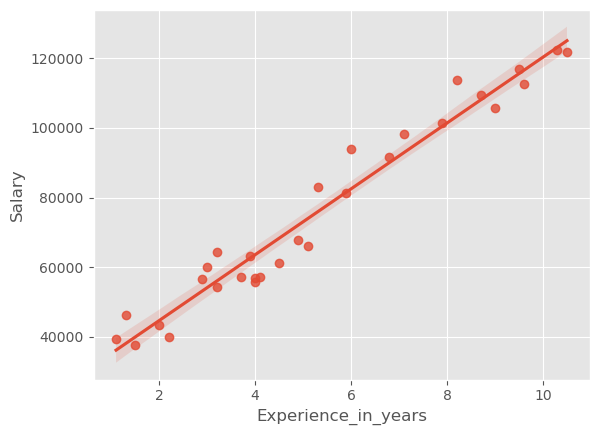

In [33]:
# plot a regression plot
sns.regplot(data = df , x='Experience_in_years' , y = 'Salary');

# From the above , We can say that as the experience increases the salary also increasing

In [35]:
# calculate the mean squared error
from sklearn.metrics import mean_squared_error

In [36]:
mse_train = mean_squared_error(y_train,pred_train,squared = False)
mse_test = mean_squared_error(y_test,pred_test,squared=False)
mse_train , mse_test

(5205.982110155719, 7059.04362190151)